In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib notebook
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('SpeedDating.csv', encoding= 'unicode_escape')

In [3]:
# df.to_excel("Speed.xlsx",index = False)

In [4]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [5]:
print(df.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [6]:
c = df['zipcode'].dropna().index
for i in range(df.shape[0]):
    if i in c:
        if type(df['zipcode'][i]) != int :
            df.loc[i,'zipcode'] = int(df.loc[i,'zipcode'].replace(',',''))
df['zipcode'] = pd.to_numeric(df['zipcode'])

In [7]:
# the iid of 118 was skipped in wave 5 and so the pid was nan
df['pid'] = df['pid'].fillna(118)

In [8]:
# extracting only the relevant information of whether they are ungrads
df['undergra'] = df['undergra'].fillna(0)
for i in range(df.shape[0]):
    if type(df['undergra'][i]) != int :
            df.loc[i,'undergra'] = 1
df['undergra'] = pd.to_numeric(df['undergra'])

In [9]:
c = df['mn_sat'].dropna().index
for i in range(df.shape[0]):
    if i in c:
        if type(df['mn_sat'][i]) != int :
            df.loc[i,'mn_sat'] = int(df.loc[i,'mn_sat'].replace(',','')[:-3])
df['mn_sat'] = pd.to_numeric(df['mn_sat'])

In [10]:
c = df['tuition'].dropna().index
for i in range(df.shape[0]):
    if i in c:
        if type(df['tuition'][i]) != int :
            df.loc[i,'tuition'] = int(df.loc[i,'tuition'].replace(',','')[:-3])
df['tuition'] = pd.to_numeric(df['tuition'])

In [11]:
# df is a pandas dataframe
encoder = preprocessing.LabelEncoder()
encoder.fit(df['from'])
df['from_c'] = encoder.transform(df['from'])

# reverse transform -> encoder.inverse_transform(df['column_name_encoded'])

In [12]:
c = df['income'].dropna().index
for i in range(df.shape[0]):
    if i in c:
        if type(df['income'][i]) != int :
            df.loc[i,'income'] = int(df.loc[i,'income'].replace(',','')[:-3])
df['income'] = pd.to_numeric(df['income'])

In [13]:
#adding a 'career_c' encoding column for 'career' and 'other' if there it is not possible
for i in range(df.shape[0]):
    if np.isnan(df['career_c'][i]) :
        if (not pd.isnull(df['career'][i])) :
            if 'law' in df['career'][i].lower():
                df.loc[i,'career_c'] = 1
            elif 'academia'in df['career'][i].lower() or 'research' in df['career'][i].lower():
                df.loc[i,'career_c'] = 2
            elif 'psychologist' in df['career'][i].lower():
                df.loc[i,'career_c'] = 3
            elif 'doctor' in df['career'][i].lower() or 'medicine' in df['career'][i].lower():
                df.loc[i,'career_c'] = 4
            elif 'engineer' in df['career'][i].lower():
                df.loc[i,'career_c'] = 5
            elif 'creative' in df['career'][i].lower() or 'art' in df['career'][i].lower() or 'entertain' in df['career'][i].lower():
                df.loc[i,'career_c'] = 6
            elif 'bank' in df['career'][i].lower() or 'consult' in df['career'][i].lower() or 'financ' in df['career'][i].lower() or 'market'in df['career'][i].lower() or 'business' in df['career'][i].lower() or 'ceo' in df['career'][i].lower() or 'entrepreneur' in df['career'][i].lower() or 'admin' in df['career'][i].lower():
                df.loc[i,'career_c'] = 7
            elif 'estate' in df['career'][i].lower():
                df.loc[i,'career_c'] = 8
            elif 'international' in df['career'][i].lower() or 'human' in df['career'][i].lower() or 'affair' in df['career'][i].lower():
                df.loc[i,'career_c'] = 9
            elif 'undecided' in df['career'][i].lower():
                df.loc[i,'career_c'] = 10
            elif 'social' in df['career'][i].lower():
                df.loc[i,'career_c'] = 11
            elif 'speech' in df['career'][i].lower() or 'patholog' in df['career'][i].lower():
                df.loc[i,'career_c'] = 12
            elif 'politic' in df['career'][i].lower():
                df.loc[i,'career_c'] = 13
            elif 'sport' in df['career'][i].lower() or 'athletic' in df['career'][i].lower():
                df.loc[i,'career_c'] = 14
            elif 'journal' in df['career'][i].lower():
                df.loc[i,'career_c'] = 16
            elif 'architec' in df['career'][i].lower():
                df.loc[i,'career_c'] = 17
df['career_c'].fillna(15,inplace=True)

In [14]:
df.drop(["id","idg","position","positin1","partner","field"], axis = 1, inplace = True)

<IPython.core.display.Javascript object>


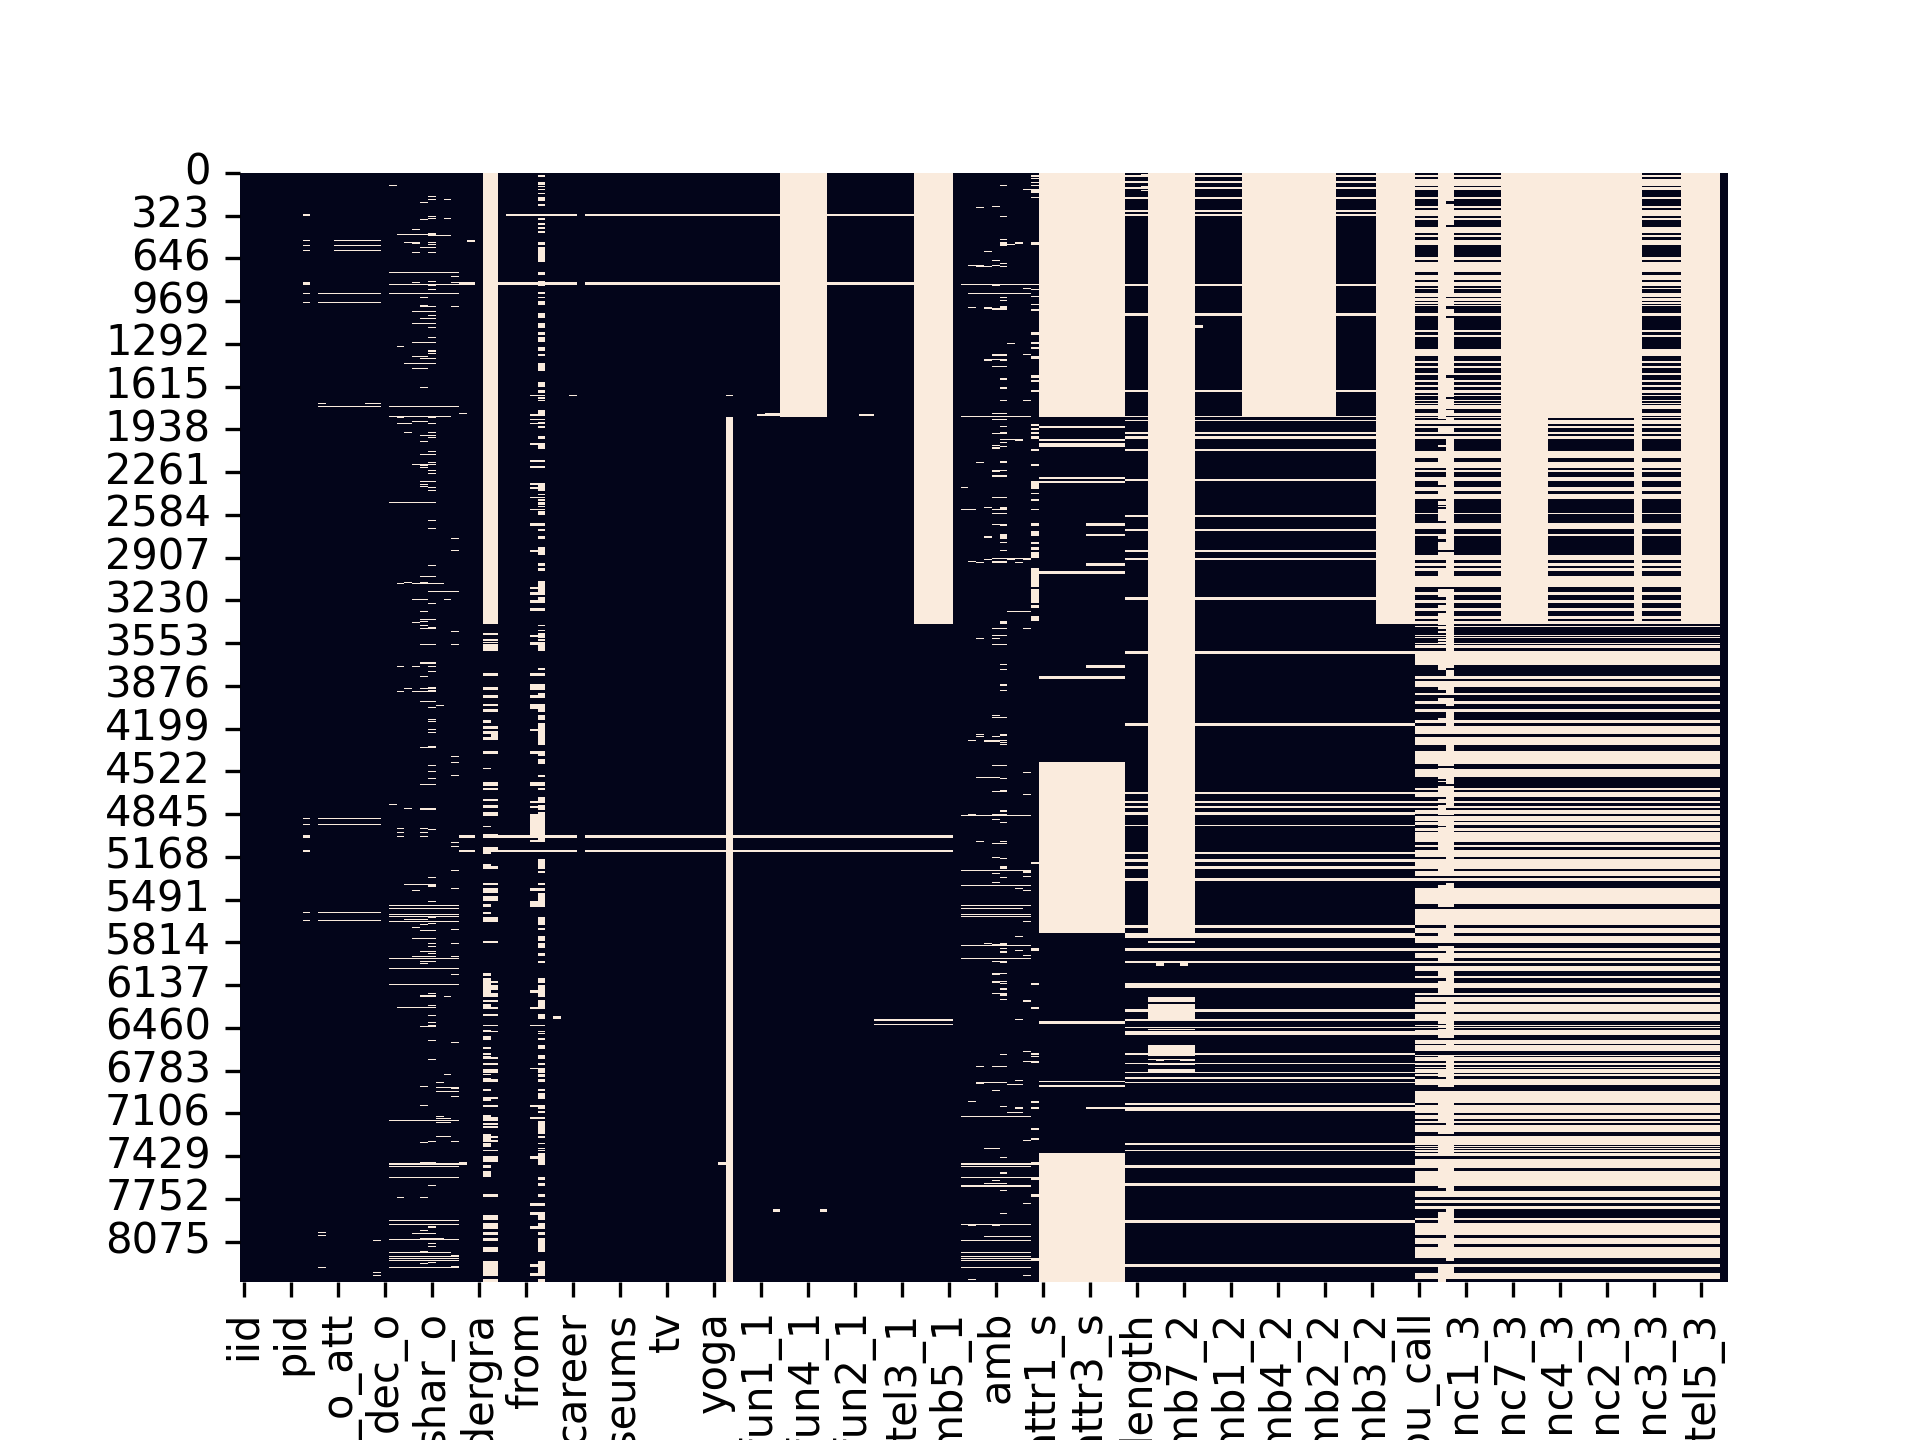

In [15]:
sns.heatmap(df.isnull(), cbar=False)
plt.savefig('my_plot.png')

### Principal component analysis
To ensure the accuracy of PCA results, it is crucial to check for high correlation between variables before applying PCA. It's also important to note that the correlation between two features, such as race and round, or income and zip code, doesn't necessarily imply causation. Additionally, it's important to keep in mind that the correlation between features may change over time, and therefore, it's necessary to examine the correlation patterns during the data collection process. Finally, we shouldn't discard correlated features per time unless there is a valid reason to do so, as it might contain valuable information that can help to explain the underlying patterns in the data.

In [18]:
wave_list = df['wave'].unique().tolist()
dict_by_wave = {}

In [19]:
for i in wave_list:
    dict_by_wave[f'df_wave_{i}'] = df[df['wave']==i]
    

In [20]:
dict_by_wave['df_wave_1']

,iid,gender,condtn,wave,round,order,pid,match,int_corr,samerace,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,from_c
0,1,0,1,1,10,4,11.0,0,0.14,0,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49
1,1,0,1,1,10,3,12.0,0,0.54,0,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49
2,1,0,1,1,10,10,13.0,1,0.16,1,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49
3,1,0,1,1,10,5,14.0,1,0.61,0,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49
4,1,0,1,1,10,7,15.0,1,0.21,0,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20,1,1,1,10,10,6.0,0,0.43,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229
196,20,1,1,1,10,7,7.0,0,-0.16,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229
197,20,1,1,1,10,2,8.0,1,-0.21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229
198,20,1,1,1,10,3,9.0,0,-0.23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229


The correlation matrix is calculated only for variables that could be correlated with each other, while eliminating the variables that evolve over time.

In [ ]:

corr_matrix = dict_by_wave['df_wave_1'][['match',
'int_corr',
'samerace',
'age_o',
'race_o',
'pf_o_att',
'pf_o_sin',
'pf_o_int',
'pf_o_fun',
'pf_o_amb',
'pf_o_sha',
'dec_o',
'attr_o',
'sinc_o',
'intel_o',
'fun_o',
'amb_o',
'shar_o',
'like_o',
'prob_o',
'met_o',
'age',
'field_cd',
'undergra',
'mn_sat',
'tuition',
'race',
'imprace',
'imprelig',
'from',
'income',
'goal',
'date',
'go_out',
'career',
'career_c',
'from_c']].corr()
corr_matrix.fillna(0, inplace=True)
# plot the correlation matrix using seaborn


sns.heatmap(corr_matrix, )
#     plt.clim(-1,1)
plt.savefig('Correlation/df_wave.png')

### Conclusion
After plotting the correlation matrix, if we observe that there is no strong correlation between the features, and even if there is some correlation, it may not have any meaningful relationship between the features, thus indicating that there is no need to apply PCA in our dataset.

### Age distubution

In [ ]:
# age vs gender
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Histogram(x= df[df['gender'] == 0].age, name= 'Female', nbinsx=74 ), row=1, col=1)
fig.add_trace(go.Histogram(x= df[df['gender'] == 1].age, name= 'Male' , nbinsx=74), row=1, col=1)
fig.add_trace(go.Box(y= df[df['gender'] == 0].age, x= [0] * df[df['gender'] == 0].shape[0], name= 'Female_box'),row=1, col=2)
fig.add_trace(go.Box(y= df[df['gender'] == 1].age, x= [1] * df[df['gender'] == 1].shape[0], name= 'Male_box'),row=1, col=2)
fig.update_layout(height=600, width=1100, barmode='stack', title_text="Age distribution for females (0) and males (1)")
fig.show()

### so, what is match percent ?

In [ ]:
fig = go.Figure(data=[
    go.Pie(values= df['match'].value_counts(), 
           labels= ['No', 'Yes'],
           pull=[0, 0.20], 
           marker_colors= ['#FF4040', '#7AB02C'])
])

fig.update_layout(height = 600, width= 600,legend_title_text='Match', title=f"Count of matches/no-matches")

In [ ]:
atributes_gender = df[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_gender.columns = cols

In [ ]:
trace1 = go.Bar(
    y=list(atributes_gender.iloc[1]),
    x=atributes_gender.columns.values,
    name='Men',
    marker=dict(
        color='darkblue'
    )
)
trace2 = go.Bar(
    y=list(atributes_gender.iloc[0]),
    x=atributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='pink'
    )
)

data1 = [trace1, trace2]
layout = go.Layout(
    title='What People Are Looking For in the Opposite Sex',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='barchart')

In [ ]:
atributes_gender_2 = df[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()
atributes_gender_2.columns = cols

In [ ]:
trace1 = go.Bar(
    y=list(atributes_gender_2.iloc[1]),
    x=atributes_gender.columns.values,
    name='Men',
    marker=dict(
        color='darkblue'
    )
)
trace2 = go.Bar(
    y=list(atributes_gender_2.iloc[0]),
    x=atributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='pink'
    )
)

data2 = [trace1, trace2]
layout = go.Layout(
    title='What People Think the Opposite Sex is Looking For',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='barchart')

### Activities interested by Men Vs Women

In [ ]:
activities_interested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
activities = df.groupby(['gender']).mean()[activities_interested].values

In [ ]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities[0,:],
    name='Women',
    #orientation = 'h',
    marker=dict(
        color='pink'
    )
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities[1,:],
    name='Men',
    #orientation = 'h',
    marker=dict(
        color='darkblue'
    )
)

data3 = [trace1, trace2]
layout = go.Layout(
    title='Interest by activities Men vs Women',
    font=dict(
        size=16
    ),
    barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data3, layout=layout)
py.iplot(fig, filename='barchart')